# `Lead Score Case Study`

## `Steps followed during the case study: `
1. Reading and Understanding the data
2. Data Cleaning
3. Categorical Variable Analysis and Handling Data Imbalance
4. Numerical Variable Analysis and Outlier Treatment
5. Dummy Variable Creation
6. Splitting the Data in Train and Test Set
7. Scaling the Data
8. Model Building using Statsmodel and RFE
9. Plotting ROC Curve
10. Finding Optimal Cut-off Point
11. Precision and Recall Curve
12. Prediction on Test Data
13. Conclusion

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option('display.max_columns', 500)

# `1.Reading and Understanding the data`

## Importing the data

In [5]:
data=pd.read_csv("Leads.csv")

In [6]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
data.shape

(9240, 37)

### The dataset has 9240 rows and 37 columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# `2.Data Cleaning`

### Checking if there are any duplicate values in Prospect ID and Lead Number column

In [9]:
sum(data.duplicated(subset="Prospect ID"))

0

In [10]:
sum(data.duplicated(subset="Lead Number"))

0

There are no duplicate values in both the Prospect ID and Lead Number column. We can drop these columns as they are only used for unique identification.

### Dropping the Prospect ID and Lead number columns.

In [11]:
data.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [12]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
data.shape

(9240, 35)

### Checking the null values in each column

In [14]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

### Dropping the columns having more than 40% of null values

In [16]:
for i in data.columns:
    if((data[i].isnull().sum()/len(data)*100)>40):
        data.drop(i,1,inplace=True)

In [17]:
round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Through Recommendations                           0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive Mo

In [18]:
data.shape

(9240, 30)

## Imputing the Null Values

In [19]:
data.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
#Replacing the Null values in Tags variable with not specified as they are the highest in count
data.Tags.fillna(value="Not SPecified",inplace=True)

In [21]:
# Replacing the low frequency values with Other Tags
data.Tags=data.Tags.replace(["invalid number","Diploma holder (Not Eligible)","wrong number given","opp hangup","number not provided","in touch with EINS","Lost to Others","Still Thinking","Want to take admission but has financial problems","In confusion whether part time or DLP","Interested in Next batch","Lateral student","Shall take in the next coming month","University not recognized","Recognition issue (DEC approval)"],"Other Tags")

In [22]:
data.Tags.value_counts(dropna=False)

Not SPecified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other Tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [23]:
data["Lead Profile"].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [24]:
data["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
data["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
data["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [27]:
data["How did you hear about X Education"].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [28]:
data["Specialization"].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
data["City"].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
data["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
data["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [32]:
# Replacing the Similar Values and Low Frequency Values
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Social Media'] ,'Others')

In [33]:
# Replacing the "Select" values in the above column with Null Value
data = data.replace('Select', np.nan)

In [34]:
#Checking again the Null Value count of each column
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.0000

In [35]:
# Dropping the "How did you hear about X Education" and "Lead Profile" from the data as they have very high Null Values
data.drop(["How did you hear about X Education","Lead Profile"],1, inplace=True)

### Replacing all the null values of the Categorical Variable with the mode value of that variable

In [36]:
#Checking again the Null Value count of each column
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [37]:
Mode_Col=data[["Lead Source","Last Activity","City","Country","What is your current occupation","What matters most to you in choosing a course"]]

In [38]:
for i in Mode_Col:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [39]:
#Checking again the Null Value count of each column
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

Specialization                                   36.580087
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Origin                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Tags                                              0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [41]:
# Replacing the Null Values of TotalVisits and Page Views Per Visit with the Median Value
data["TotalVisits"].fillna(data["TotalVisits"].median(),inplace=True)

In [42]:
data["Page Views Per Visit"].fillna(data["Page Views Per Visit"].median(),inplace=True)

In [43]:
data["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
data["Specialization"].fillna(value="Not Specified",inplace=True)

In [45]:
data["Specialization"].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [46]:
data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management Specialization')

In [47]:
#Checking again the Null Value count of each column
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

There are no Null Values in the data now.

# `3.Categorical Variable Analysis and Handling Data Imbalance`

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [49]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
Cat_Col=data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]

In [51]:
Cat_Col

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,Management Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Other Tags,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Other Tags,No,No,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,SMS Sent,India,Management Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Not SPecified,No,No,Other Metro Cities,No,No,SMS Sent


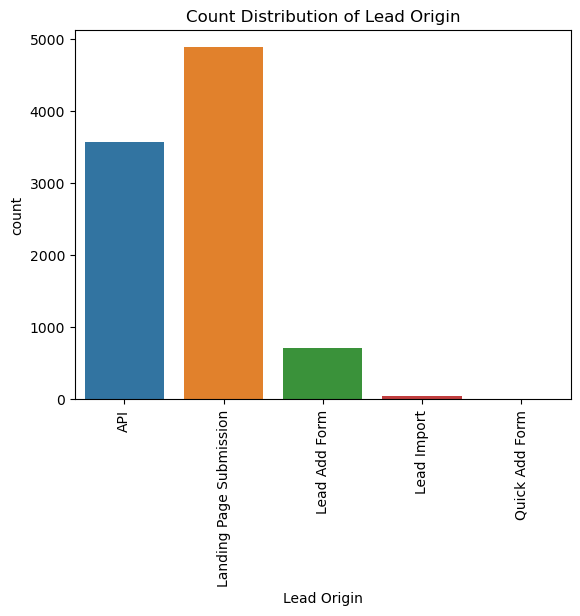

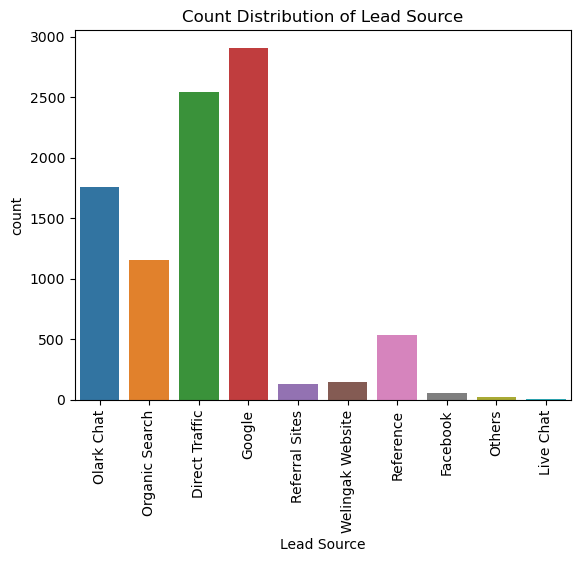

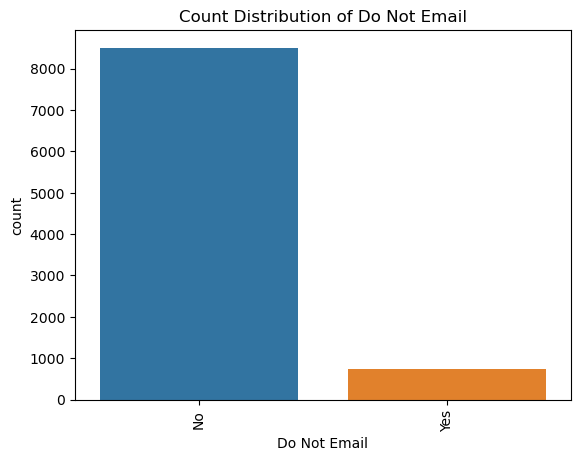

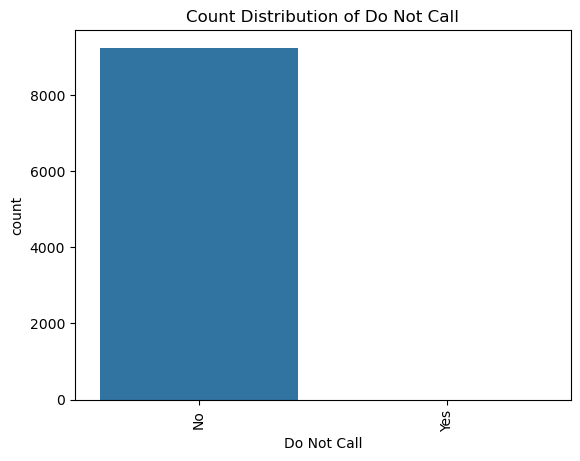

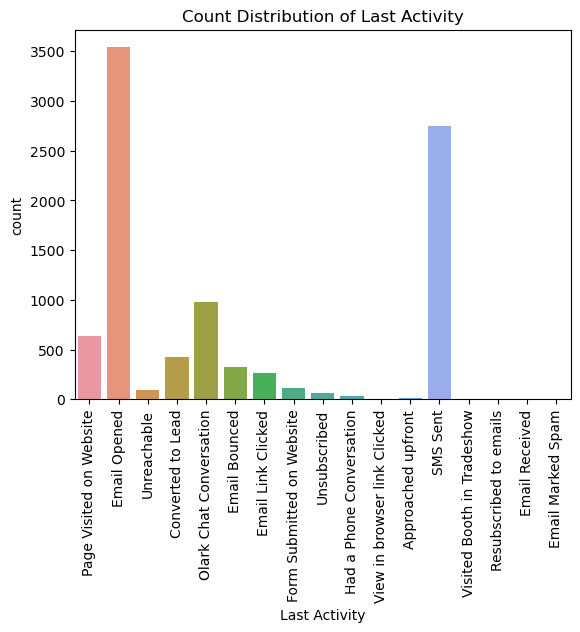

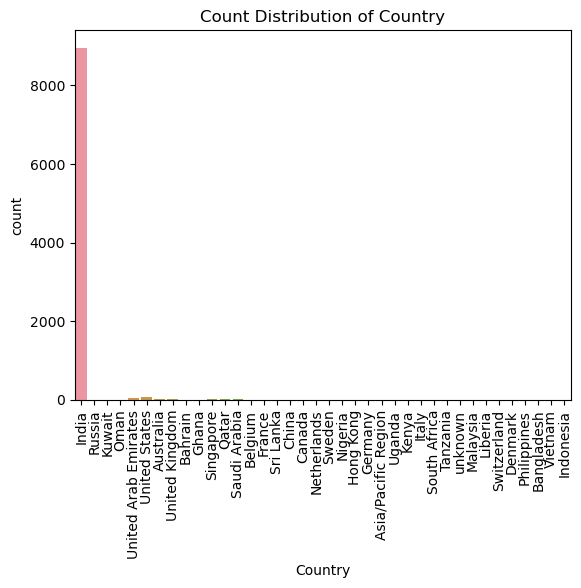

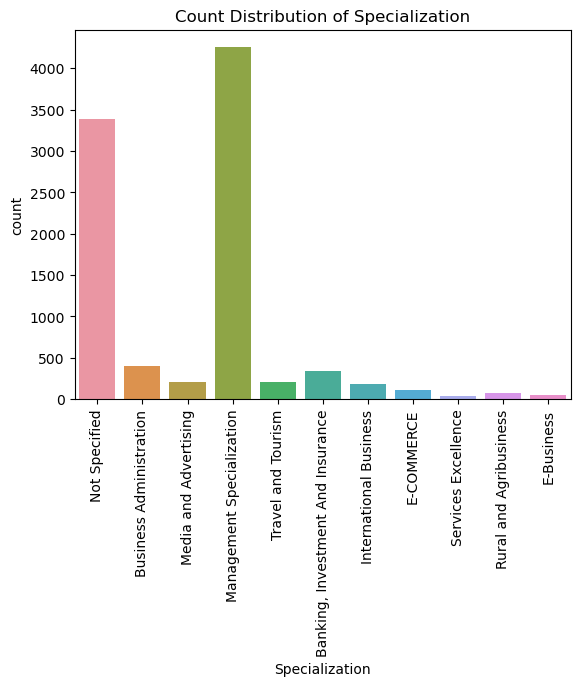

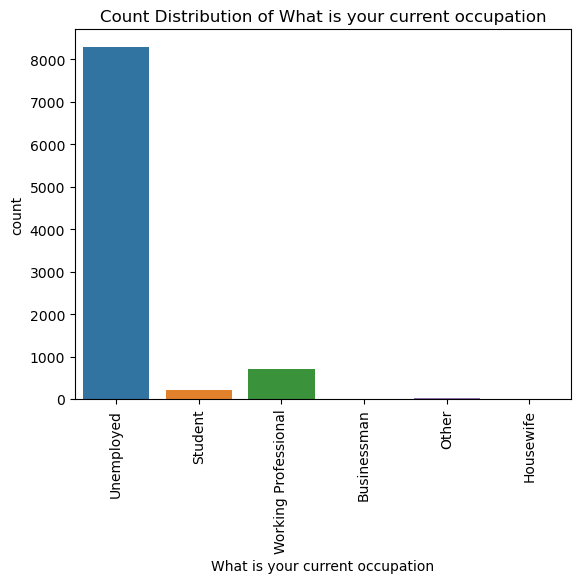

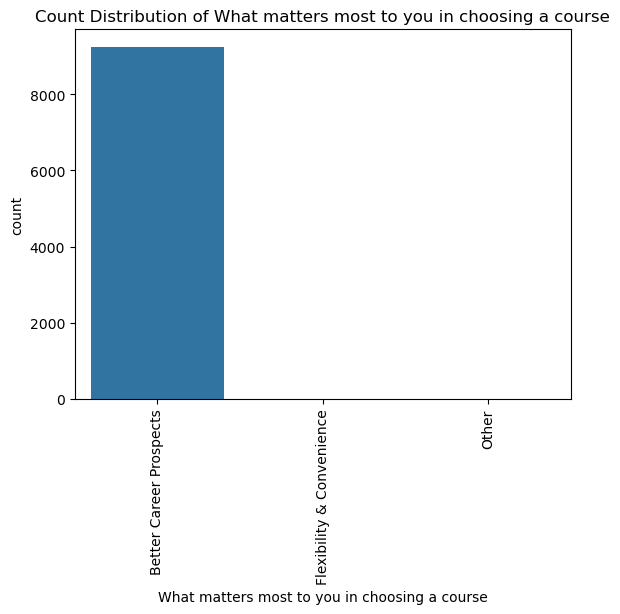

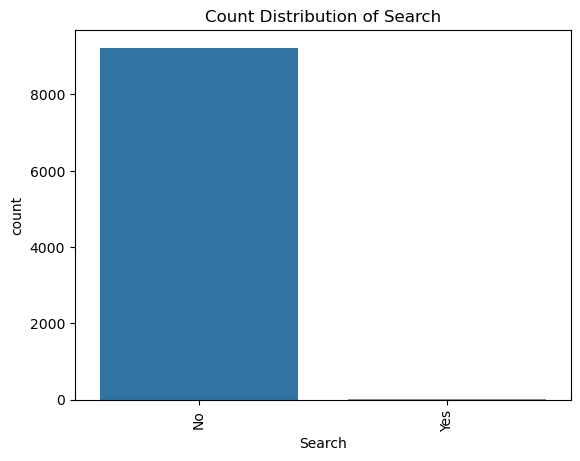

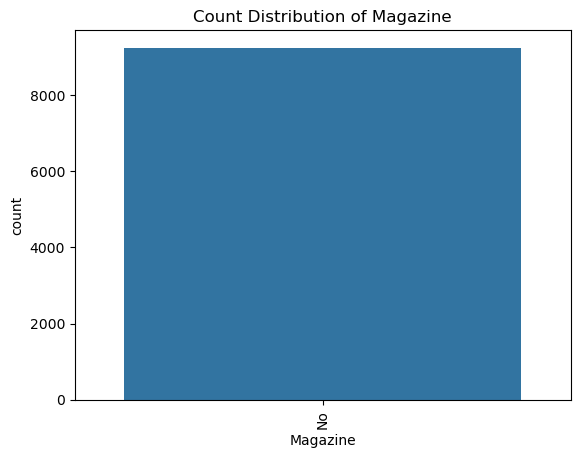

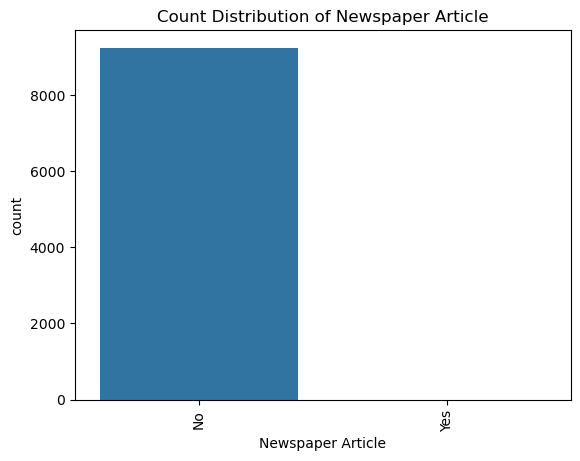

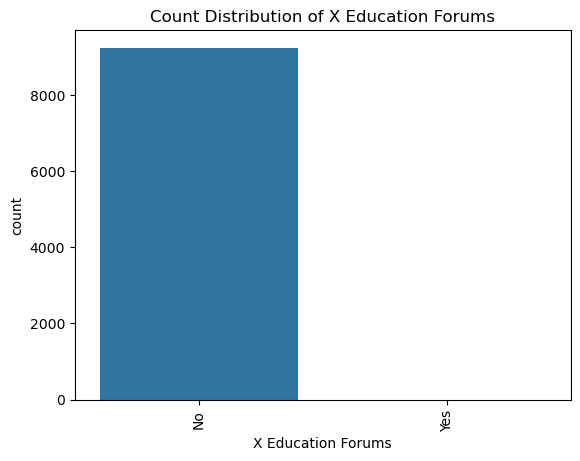

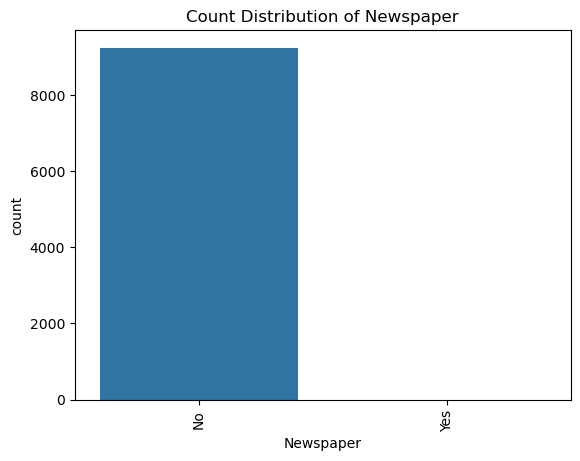

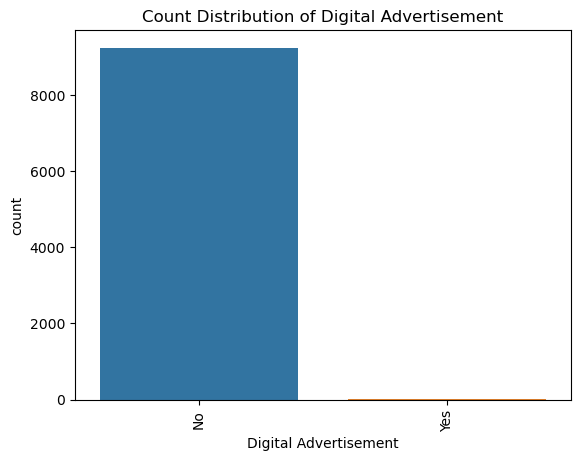

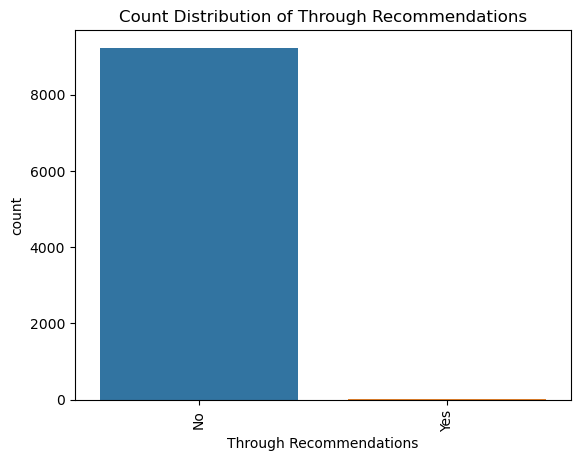

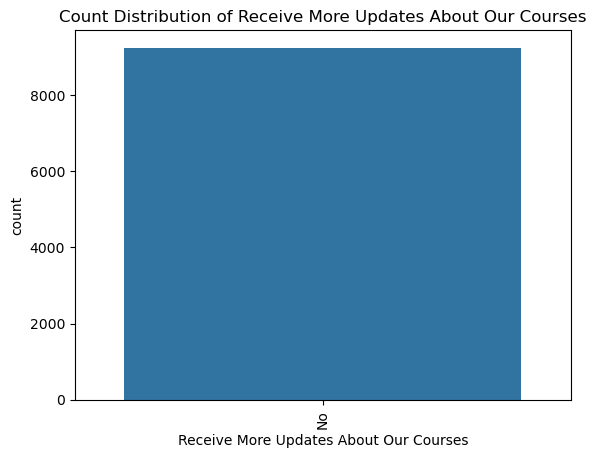

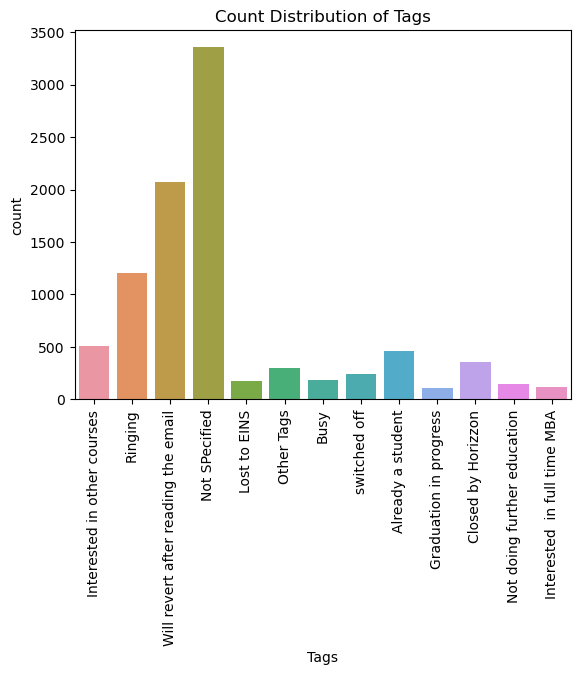

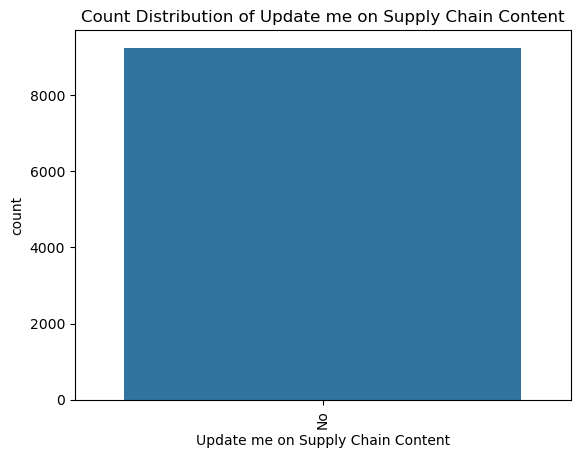

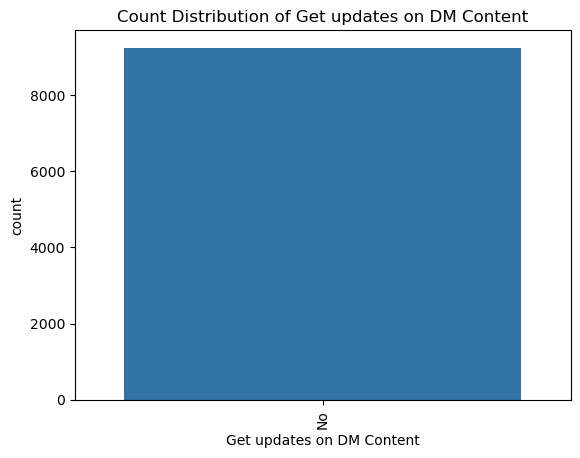

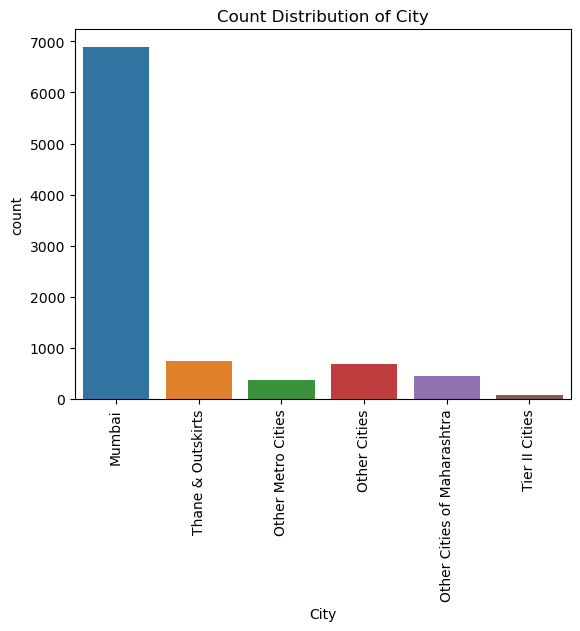

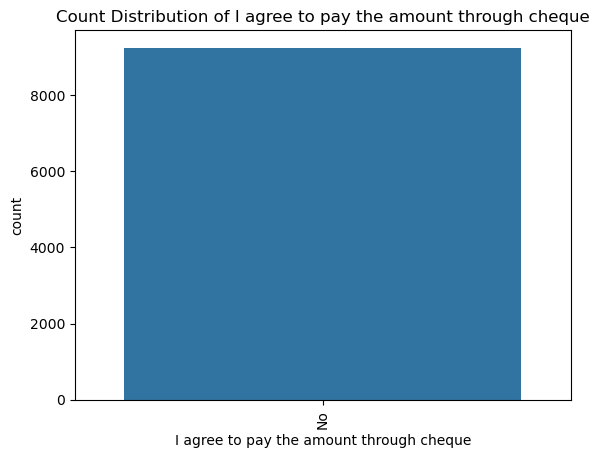

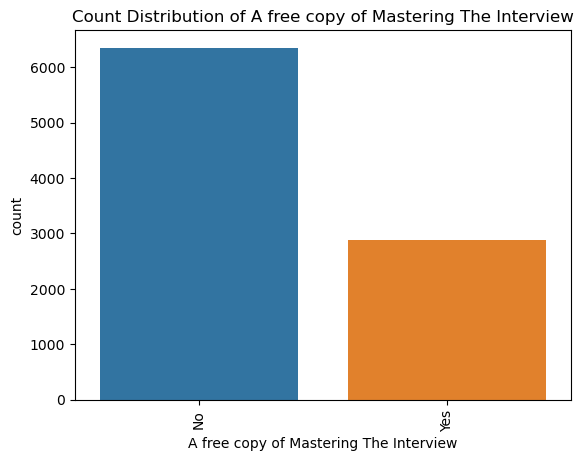

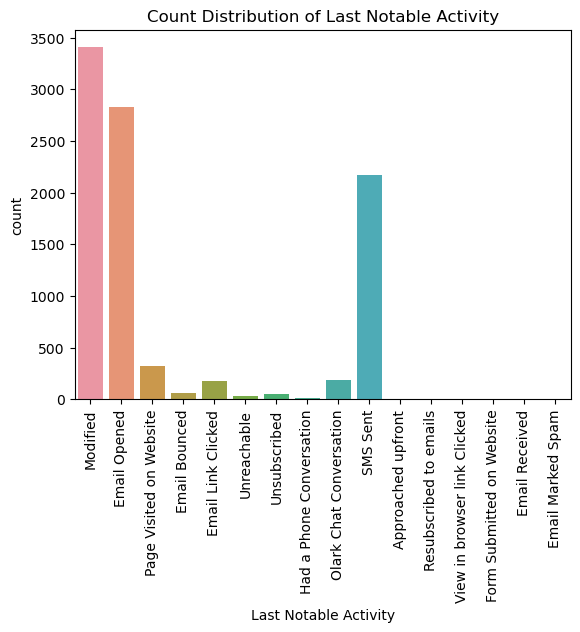

In [52]:
# Checking the count of values in Categorical Columns
for i in Cat_Col:
    sns.countplot(data[i])
    plt.xlabel(i)
    plt.title("Count Distribution of "+i)
    plt.xticks(rotation=90)
    plt.show()

## Removing the Variables having very high data imbalance

In [53]:
Cat_Col.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
Col_To_Drop=['Do Not Call','Country','What matters most to you in choosing a course',
             'Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
             'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque']

In [55]:
Col_To_Drop

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [56]:
data.drop(Col_To_Drop,1,inplace=True)

In [57]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [58]:
data.shape

(9240, 14)

In [59]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [60]:
New_Cat_Col=data[['Lead Origin', 'Lead Source','Do Not Email','Last Activity',
                  'Specialization','What is your current occupation','Tags', 
                  'City', 'A free copy of Mastering The Interview','Last Notable Activity']]

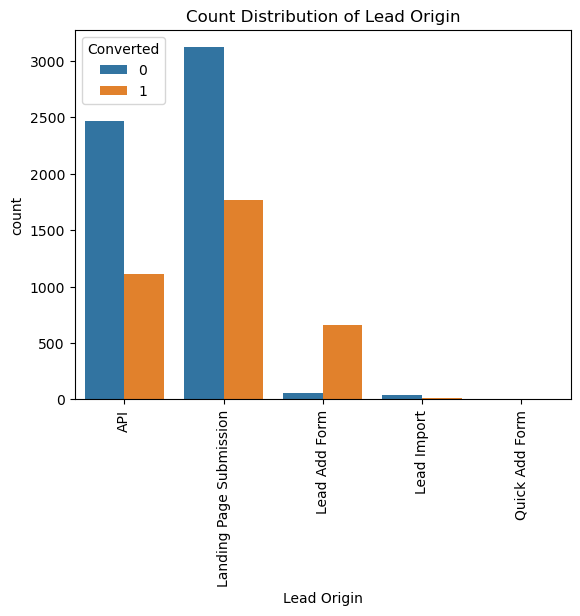

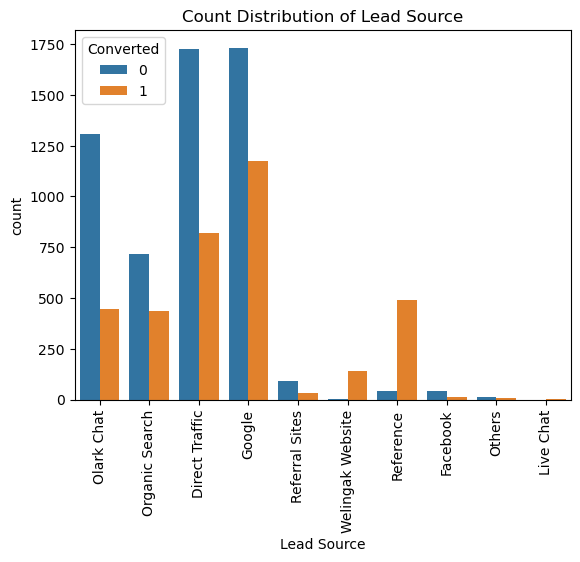

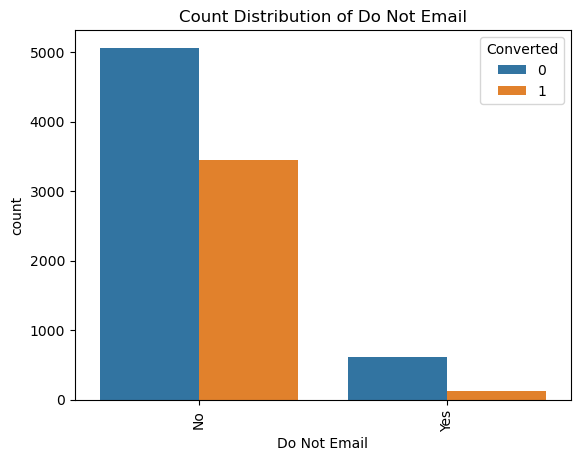

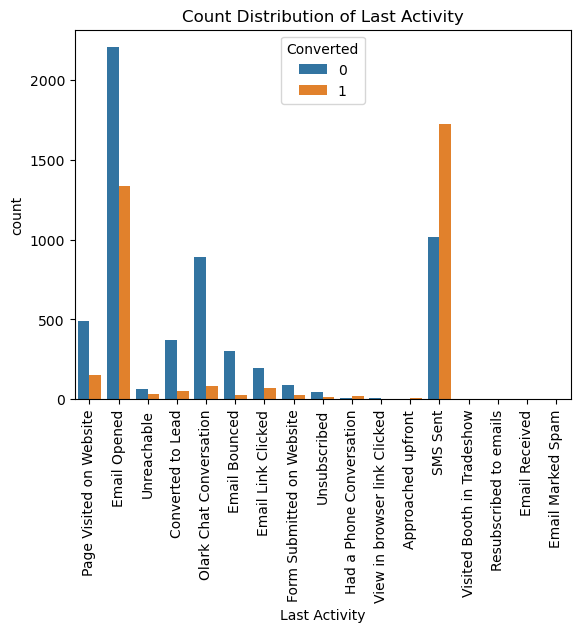

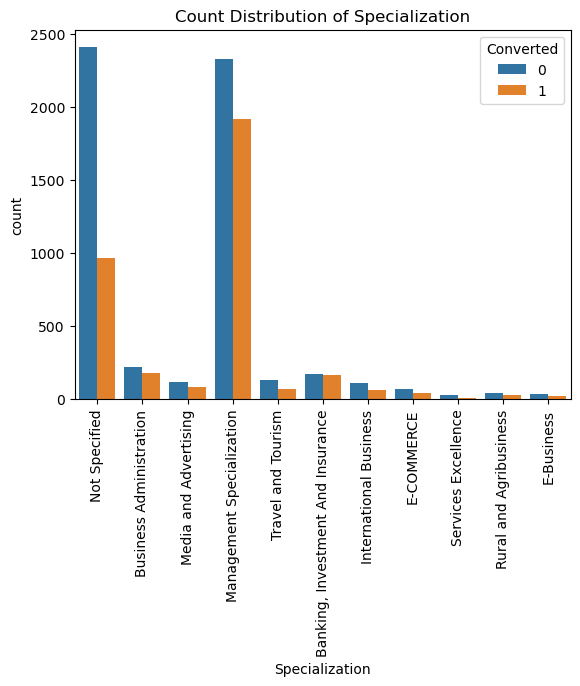

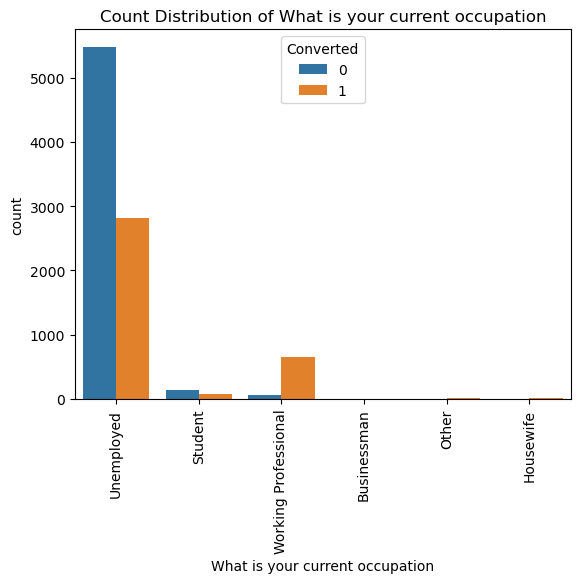

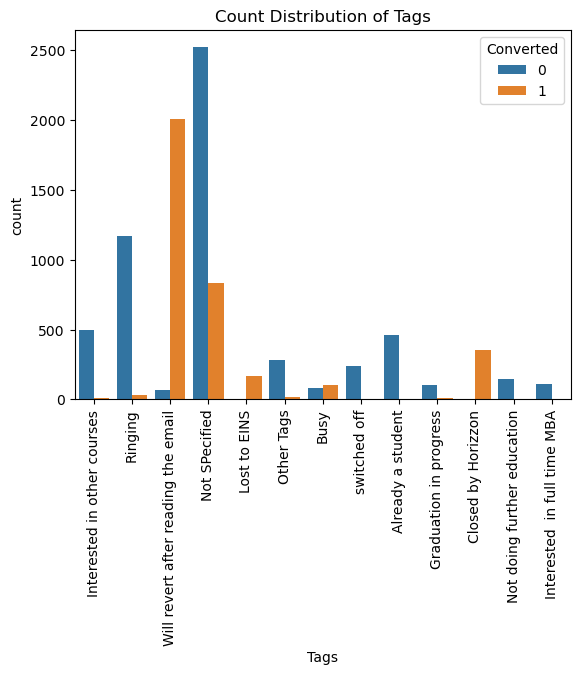

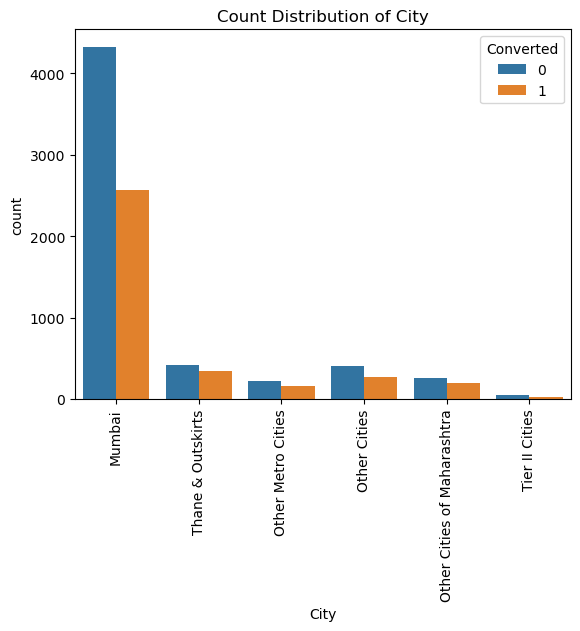

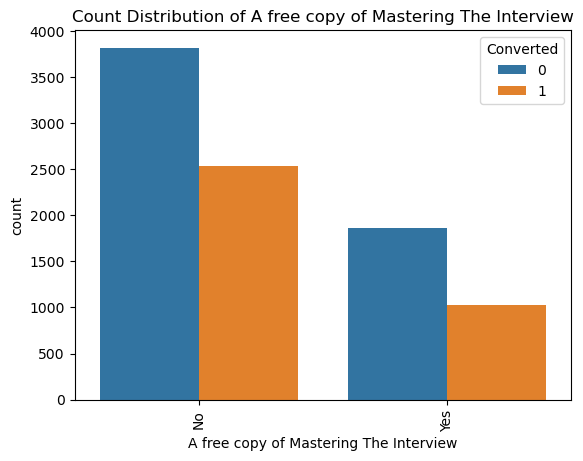

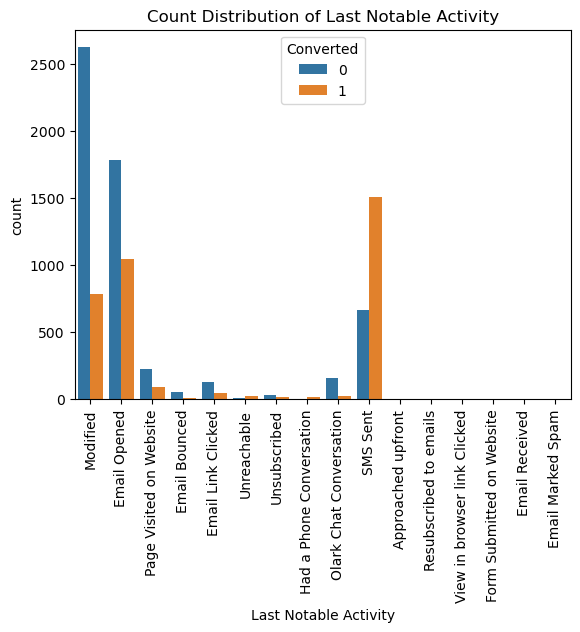

In [61]:
for i in New_Cat_Col:
    sns.countplot(x=i,hue="Converted",data=data)
    plt.title("Count Distribution of "+i)
    plt.xticks(rotation=90)
    plt.show()

In [62]:
# Replacing the low frequency values in the "Last Activity" Variable
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others Activities')

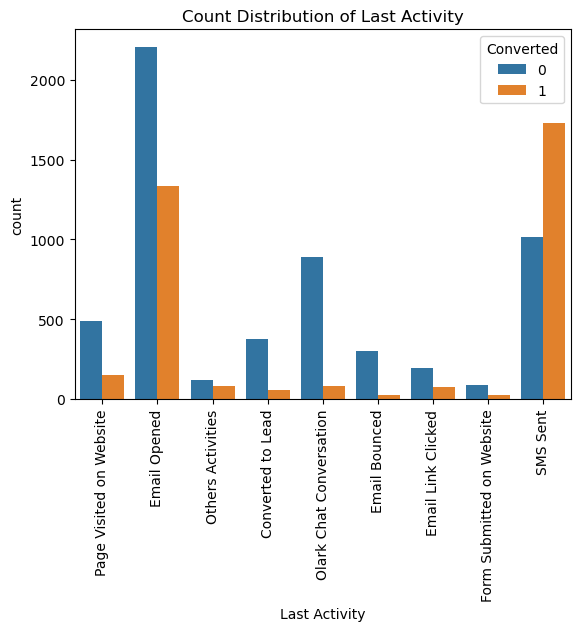

In [63]:
sns.countplot(x="Last Activity",hue="Converted",data=data)
plt.title("Count Distribution of Last Activity")
plt.xticks(rotation=90)
plt.show()

In [64]:
# Replacing the low frequency values in the "Last Notable Activity" Variable
data['Last Notable Activity'] =data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_Activities')

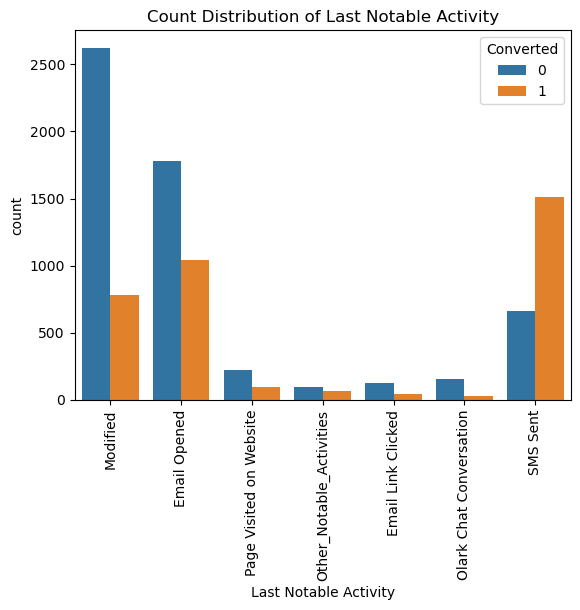

In [65]:
sns.countplot(x="Last Notable Activity",hue="Converted",data=data)
plt.title("Count Distribution of Last Notable Activity")
plt.xticks(rotation=90)
plt.show()

## `Insights from the Analysis of Categorical Variable`
--Lead Origin
1.	Most of the leads have been generated from API and Landing Page Submission. 
2.	Lead Add from has very High Conversion rate followed by Landing Page Submission and API.
3.	To increase the overall lead conversion, more leads from API and Landing Page Submission needs to converted and more leads can be generated from Lead Add Form, Lead Import and Quick Add Form.

--Lead Source
1.	Maximum number of leads are generated by Google, Direct Traffic and Olark Chat.
2.	References and Welingak Website have the highest conversion rate.
3.	To increase the overall lead conversion, more leads need to be converted from Sources such as Google, Organic Search, Olark Chat and Direct Traffic whereas more leads need to be generated from Referal Sites, References and Welingak Website.

--Current Occupation
1.	Most of the leads are generated from Unemployed Population.
2.	Working professionals have the highest Lead Conversion Rate.
3.	Overall Lead Conversion can be increased by converting more leads from Unemployed and increase the number of leads from Students and Working Professionals.

--City
1.	Maximum leads are generated from Mumbai and it also has highest lead conversion rate.
2.	Conversion rate can be increased by generating more leads from other cities and converting more leads from Mumbai.

--Specialization
1.	Highest Number of leads are generated from Management Specialization and it also has the highest conversion rate.
2.	To increase the overall lead conversion, more leads need to generated from other specializations.



# `4.Numerical Variable Analysis and Outlier Treatment`

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [67]:
Num_Col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

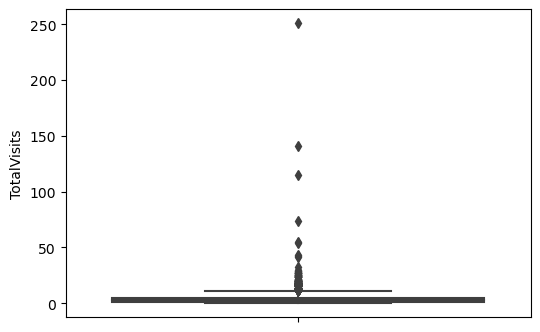

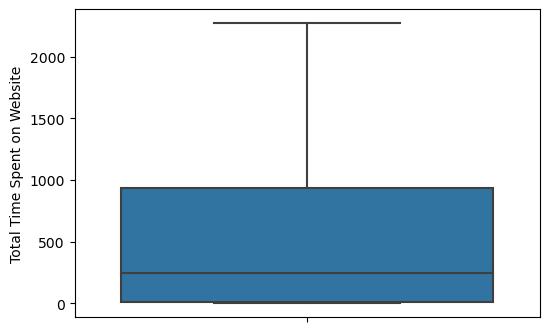

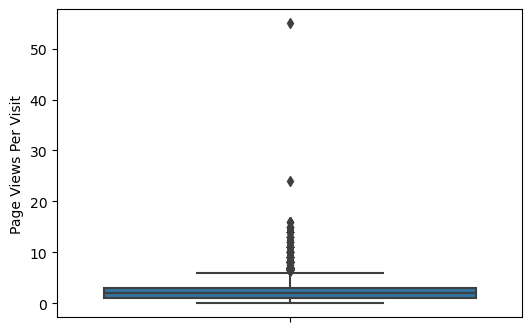

In [68]:
for i in Num_Col:
    plt.figure(figsize=[6,4])
    sns.boxplot(y=data[i])
    plt.show()

From the above plots, we can see that in "Page Views Per Visit" and "TotalVisits" Variables, there are outliers present.

#### Outlier Treatment for "TotalVisits" Variable

In [69]:
data.TotalVisits.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [70]:
#Removing the top 3% of the outliers
Q_TV=data.TotalVisits.quantile(0.97)
data = data[(data.TotalVisits <= Q_TV)]

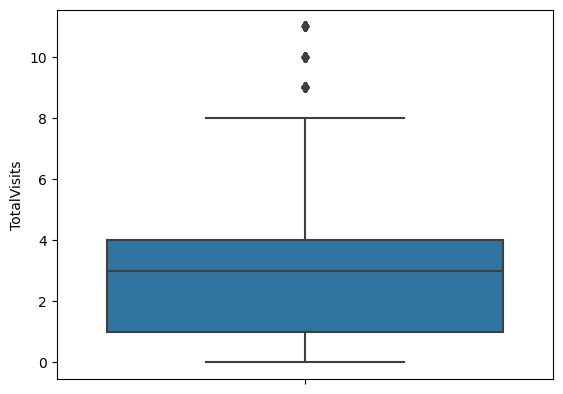

In [71]:
sns.boxplot(y=data.TotalVisits)
plt.show()

#### Outlier Treatment for "Page Views Per Visit" Variable

In [72]:
data["Page Views Per Visit"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8973.000000
mean        2.271752
std         1.946753
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        11.000000
Name: Page Views Per Visit, dtype: float64

In [73]:
#Removing the top 3% of the outliers
Q_PV=data["Page Views Per Visit"].quantile(0.98)
data = data[(data["Page Views Per Visit"] <= Q_PV)]

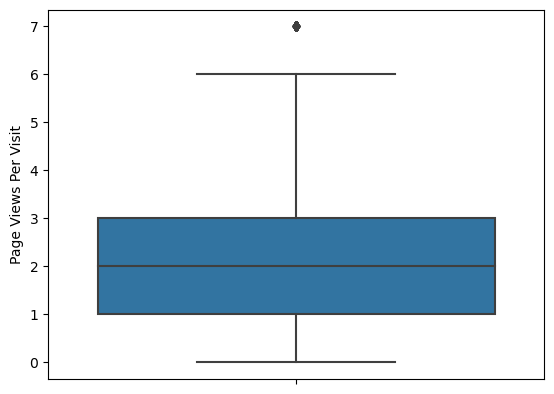

In [74]:
sns.boxplot(y=data["Page Views Per Visit"])
plt.show()

In [75]:
data.shape

(8804, 14)

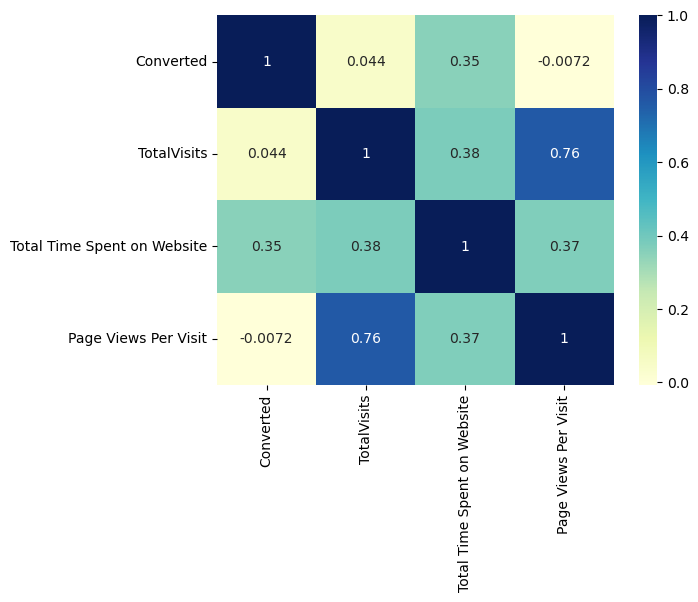

In [76]:
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [77]:
# Total Lead Conversion Ratio
round(sum(data.Converted)/(len(data.Converted))*100,2)

38.36

Total of 38.36 percents of lead are converted

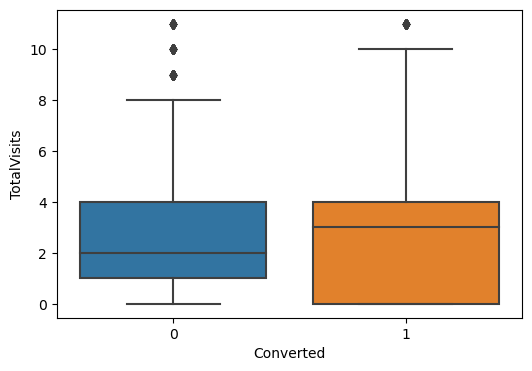

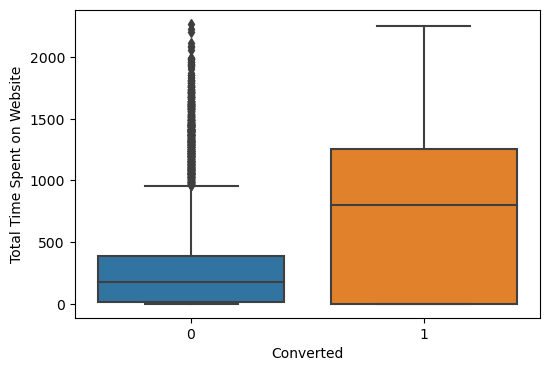

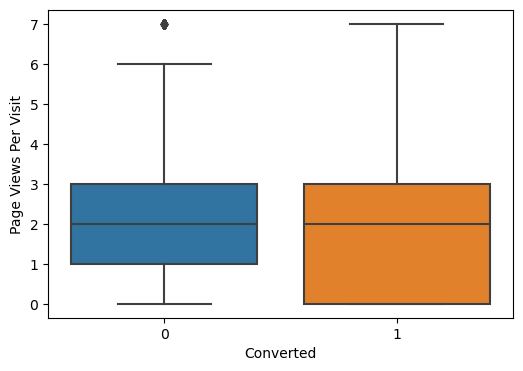

In [78]:
for i in Num_Col:
    plt.figure(figsize=[6,4])
    sns.boxplot(data=data,x="Converted",y=i)
    plt.show()

## `Insights from Analysis of Numerical Columns`

Leads spending more time on the Website are more likely to convert.
The overall conversion rate can be increased by making the website more interesting and interactive to the visitors.

# `5.Dummy Variable Creation`

In [79]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others Activities,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [80]:
list=['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[list] =data[list].apply(binary_map)

In [81]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others Activities,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [82]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [83]:
Lead_Origin=pd.get_dummies(data['Lead Origin'],drop_first=True,prefix='Lead Origin')
Lead_Source=pd.get_dummies(data['Lead Source'],drop_first=True,prefix='Lead Source')
Last_Activity=pd.get_dummies(data['Last Activity'],drop_first=True,prefix='Last Activity')
Specialization=pd.get_dummies(data['Specialization'],drop_first=True,prefix='Specialization')
Current_Occupn=pd.get_dummies(data['What is your current occupation'],drop_first=True,prefix='Current Occupation')
Tags=pd.get_dummies(data['Tags'],drop_first=True,prefix='Tags')
City=pd.get_dummies(data['City'],drop_first=True,prefix='City')
Last_Notable_Activity=pd.get_dummies(data['Last Notable Activity'],drop_first=True,prefix='Last Notable Activity')

In [84]:
# Concatenating all the dummy variables with the main dataset
data=pd.concat([data,Lead_Origin,Lead_Source,Last_Activity,Specialization,Current_Occupn,Tags,City,Last_Notable_Activity],axis=1)

In [85]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not SPecified,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others Activities,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [86]:
data.shape

(8804, 73)

In [87]:
data.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 
          'What is your current occupation','Tags', 'City', 'Last Notable Activity'],1,inplace=True)

In [88]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not SPecified,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
data.shape

(8804, 65)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Do Not Email                                    8804 non-null   int64  
 1   Converted                                       8804 non-null   int64  
 2   TotalVisits                                     8804 non-null   float64
 3   Total Time Spent on Website                     8804 non-null   int64  
 4   Page Views Per Visit                            8804 non-null   float64
 5   A free copy of Mastering The Interview          8804 non-null   int64  
 6   Lead Origin_Landing Page Submission             8804 non-null   uint8  
 7   Lead Origin_Lead Add Form                       8804 non-null   uint8  
 8   Lead Origin_Lead Import                         8804 non-null   uint8  
 9   Lead Origin_Quick Add Form               

# `6.Splitting the Data in Train-Test Set`

In [91]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = data['Converted']
X=data.drop('Converted', axis=1)

In [92]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 8804, dtype: int64

In [93]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not SPecified,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [94]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [95]:
X_train.shape

(6162, 64)

In [96]:
X_test.shape

(2642, 64)

In [97]:
y_train.shape

(6162,)

In [98]:
y_test.shape

(2642,)

# `7.Scaling the Data`

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not SPecified,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
635,-0.287353,-1.171267,-0.877920,-1.243341,-0.658045,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
610,-0.287353,0.446519,1.887706,1.068358,-0.658045,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5153,-0.287353,-1.171267,-0.877920,-1.243341,-0.658045,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8102,-0.287353,-1.171267,-0.877920,-1.243341,-0.658045,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
419,-0.287353,1.659859,-0.305909,0.779396,1.519653,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


# `8.Model Building using StatsModel and RFE`

In [100]:
import statsmodels.api as sm

## `Model1`

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [103]:
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6097
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1158.3
Date:                Sun, 19 Mar 2023   Deviance:                       2316.6
Time:                        17:53:39   Pearson chi2:                 1.44e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6162
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.5591      1.847     -2.468      0.014      -8.179      -0.939
Do Not Email                                      -0.2325      0.084     -2.772      0.006      -0.397      -0.068
TotalVisits                                        0.1764      0.089      1.993      0.046       0.003       0.350
Total Time Spent on Website                        1.0519      0.065     16.209      0.000       0.925       1.179
Page Views Per Visit                              -0.3069      0.103     -2.977      0.003      -0.509      -0.105
A free copy of Mastering The Interview            -0.0826      0.090     -0.915      0.360      -0.260       0.094
Lead Origin_Landing Page Submission               -0.5889      0.247     -2.389      0.017      -1.072      -0.106
Lead Origin_Lead Add Form                          2.2454      0.849      2.646      0.008       0.582       3.908
Lead Origin_Lead Import                            2.3513      2.320      1.013      0.311      -2.196       6.899
Lead Origin_Quick Add Form                        23.4461   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                              -2.3174      2.326     -0.996      0.319      -6.876       2.241
Lead Source_Google                                 0.1241      0.204      0.608      0.543      -0.276       0.524
Lead Source_Live Chat                             15.5094   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                             0.8593      0.264      3.251      0.001       0.341       1.377
Lead Source_Organic Search                         0.1043      0.234      0.446      0.656      -0.354       0.563
Lead Source_Others                                 0.8655      0.994      0.871      0.384      -1.083       2.814
Lead Source_Reference                             -1.5533      0.946     -1.642      0.101      -3.407       0.300
Lead Source_Referral Sites                         0.0526      0.526      0.100      0.920      -0.978       1.083
Lead Source_Welingak Website                       2.8288      1.128      2.508      0.012       0.618       5.039
Last Activity_Email Bounced                       -0.4229      0.664     -0.637      0.524      -1.723       0.878
Last Activity_Email Link Clicked                   1.4730      0.643      2.292      0.022       0.213       2.733
Last Activity_Email Opened                         0.4806      0.439      1.095      0.274      -0.380       1.341
Last Activity_Form Submitted on Website            0.4502      0.644      0.699      0.484      -0.811       1.712
Last Activity_Olark Chat Conversation             -0.1052      0.428     -0.246      0.806   

In [104]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False])

In [106]:
col = X_train.columns[rfe.support_]

In [107]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Others Activities',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specialization',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
   

In [108]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not SPecified', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

## `Model 2`

In [109]:
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6146
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1212.9
Date:                Sun, 19 Mar 2023   Deviance:                       2425.8
Time:                        17:53:42   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6094
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8725      0.277    -13.992      0.000      -4.415      -3.330
Total Time Spent on Website                       1.0538      0.062     17.065      0.000       0.933       1.175
Lead Origin_Lead Add Form                         1.5551      0.361      4.304      0.000       0.847       2.263
Lead Source_Olark Chat                            1.3613      0.146      9.322      0.000       1.075       1.647
Lead Source_Welingak Website                      3.9054      0.809      4.827      0.000       2.320       5.491
Last Activity_SMS Sent                            1.9901      0.119     16.746      0.000       1.757       2.223
Tags_Busy                                         2.6968      0.347      7.770      0.000       2.016       3.377
Tags_Closed by Horizzon                           9.0211      0.783     11.526      0.000       7.487      10.555
Tags_Lost to EINS                                 7.7703      0.594     13.071      0.000       6.605       8.935
Tags_Not SPecified                                2.1806      0.278      7.847      0.000       1.636       2.725
Tags_Other Tags                                  -0.2647      0.453     -0.585      0.559      -1.152       0.622
Tags_Ringing                                     -1.2089      0.363     -3.328      0.001      -1.921      -0.497
Tags_Will revert after reading the email          6.8289      0.323     21.136      0.000       6.196       7.462
Tags_switched off                                -1.9587      0.793     -2.471      0.013      -3.512      -0.405
Last Notable Activity_Modified                   -1.7811      0.128    -13.906      0.000      -2.032      -1.530
Last Notable Activity_Olark Chat Conversation    -1.6052      0.413     -3.889      0.000      -2.414      -0.796
=================================================================================================================
"""

P-Value of Tags_Other Tags is higheri.e. 0.559 so dropping the variable

In [110]:
col=col.drop('Tags_Other Tags',1)

## `Model 3`

In [111]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,+X_train_sm, family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6147
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1213.1
Date:                Sun, 19 Mar 2023   Deviance:                       2426.1
Time:                        17:53:42   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6093
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9694      0.230    -17.269      0.000      -4.420      -3.519
Total Time Spent on Website                       1.0533      0.062     17.054      0.000       0.932       1.174
Lead Origin_Lead Add Form                         1.5532      0.361      4.305      0.000       0.846       2.260
Lead Source_Olark Chat                            1.3613      0.146      9.324      0.000       1.075       1.647
Lead Source_Welingak Website                      3.9064      0.809      4.831      0.000       2.321       5.491
Last Activity_SMS Sent                            1.9805      0.118     16.851      0.000       1.750       2.211
Tags_Busy                                         2.7989      0.306      9.154      0.000       2.200       3.398
Tags_Closed by Horizzon                           9.1151      0.768     11.863      0.000       7.609      10.621
Tags_Lost to EINS                                 7.8643      0.576     13.665      0.000       6.736       8.992
Tags_Not SPecified                                2.2800      0.228     10.004      0.000       1.833       2.727
Tags_Ringing                                     -1.1042      0.321     -3.435      0.001      -1.734      -0.474
Tags_Will revert after reading the email          6.9248      0.285     24.304      0.000       6.366       7.483
Tags_switched off                                -1.8531      0.774     -2.395      0.017      -3.370      -0.336
Last Notable Activity_Modified                   -1.7768      0.128    -13.895      0.000      -2.027      -1.526
Last Notable Activity_Olark Chat Conversation    -1.6041      0.413     -3.887      0.000      -2.413      -0.795
=================================================================================================================
"""

All the P-values are within the acceptable range so checking the VIF values of the variables

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.80
8,Tags_Not SPecified,1.69
10,Tags_Will revert after reading the email,1.67
2,Lead Source_Olark Chat,1.65
4,Last Activity_SMS Sent,1.64
12,Last Notable Activity_Modified,1.44
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.30
6,Tags_Closed by Horizzon,1.30
9,Tags_Ringing,1.13


All the variables have VIF values are less than 5.

In [114]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [115]:
y_train_pred

635     0.324324
610     0.992923
5153    0.004919
8102    0.046105
419     0.117992
          ...   
373     0.999631
84      0.918843
8440    0.019484
7272    0.035913
5914    0.061742
Length: 6162, dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)

In [117]:
y_train_pred[:10]

array([0.32432404, 0.99292288, 0.00491915, 0.04610452, 0.11799241,
       0.99860873, 0.11532734, 0.22221061, 0.98196613, 0.22221061])

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.324324,635
1,1,0.992923,610
2,0,0.004919,5153
3,0,0.046105,8102
4,0,0.117992,419


In [119]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.324324,635,0
1,1,0.992923,610,1
2,0,0.004919,5153,0
3,0,0.046105,8102,0
4,0,0.117992,419,0


In [120]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3620  165]
 [ 279 2098]]


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9279454722492697


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.88

In [124]:
# Specificity
round(TN / float(TN+FP),2)

0.96

In [125]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
round(FP/ float(TN+FP),2)

0.04

In [126]:
# positive predictive value 
round(TP / float(TP+FP),2)

0.93

In [127]:
# Negative predictive value
round(TN / float(TN+ FN),2)

0.93

# `9.Plotting the ROC Curve`

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

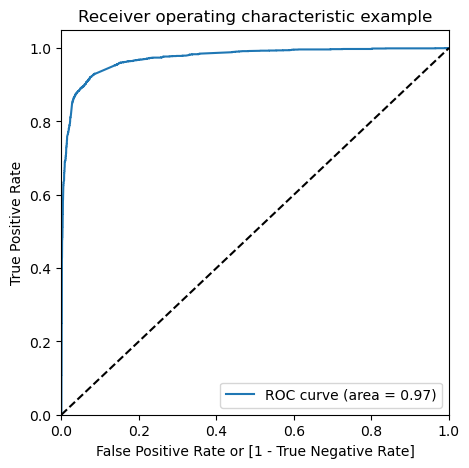

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve is 0.97 which is a good value indicating a good predicting model.

# `10.Finding Optimal Cut-off Point`

Initially the Cut-off point was arbitrarily selected as 0.5. We have to find the best cut-off point.

In [131]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.324324,635,0,1,1,1,1,0,0,0,0,0,0
1,1,0.992923,610,1,1,1,1,1,1,1,1,1,1,1
2,0,0.004919,5153,0,1,0,0,0,0,0,0,0,0,0
3,0,0.046105,8102,0,1,0,0,0,0,0,0,0,0,0
4,0,0.117992,419,0,1,1,0,0,0,0,0,0,0,0


In [132]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385751  1.000000  0.000000
0.1   0.1  0.845667  0.973496  0.765390
0.2   0.2  0.895813  0.954144  0.859181
0.3   0.3  0.923564  0.917964  0.927081
0.4   0.4  0.924862  0.901136  0.939762
0.5   0.5  0.927945  0.882625  0.956407
0.6   0.6  0.927783  0.862432  0.968824
0.7   0.7  0.912042  0.808162  0.977279
0.8   0.8  0.901006  0.772402  0.981770
0.9   0.9  0.882343  0.714346  0.987847


<Figure size 1000x3000 with 0 Axes>

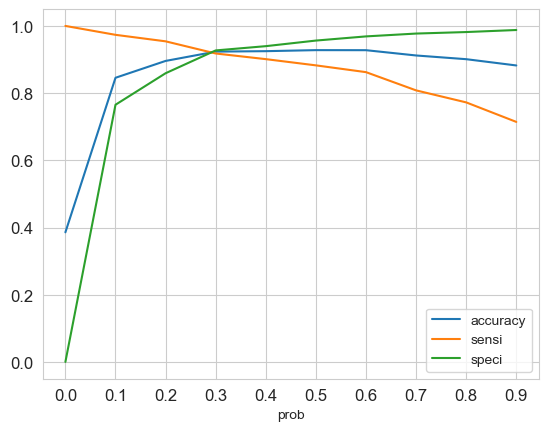

In [133]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=[10, 30])
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.1), size = 12)
plt.yticks(size = 12)
plt.show()

From the above plot, we can see that the optimum point is coming as 0.3 to take it as a cut-off probability.

In [134]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.324324,635,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.992923,610,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.004919,5153,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.046105,8102,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.117992,419,0,1,1,0,0,0,0,0,0,0,0,0


In [135]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.324324,635,1,32
1,1,0.992923,610,1,99
2,0,0.004919,5153,0,0
3,0,0.046105,8102,0,5
4,0,0.117992,419,0,12


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9235637779941578

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3509,  276],
       [ 195, 2182]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)

0.918

In [140]:
# Let us calculate specificity
round(TN / float(TN+FP),4)

0.9271

In [141]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
round(FP/ float(TN+FP),4)

0.0729

In [142]:
# Positive predictive value 
round(TP / float(TP+FP),4)

0.8877

In [143]:
# Negative predictive value
round(TN / float(TN+ FN),4)

0.9474

In [144]:
#Precision
round(TP / (TP + FP),4)

0.8877

In [145]:
# Recall
round(TP / (TP + FN),4)

0.918

# `11.Precision and Recall Curve`

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

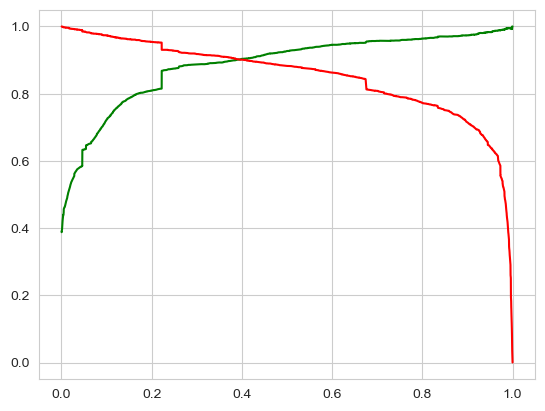

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### `Observation on Train Data`
1. Accuracy: 92%
2. Sensitivity: 91.8%
3. Specificity: 92.71%
4. Precision: 88.77%
5. Recall: 91.8%
6. False Positive Rate: 7.29%
7. Positive Predictive Value: 88.77%
8. Negative Predictive Value: 94.74%
9. ROC Curve Value: 0.97

# `12.Prediction on Test Data`

In [149]:
# Scaling the test data
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not SPecified,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3210,-0.296126,-1.177630,-0.869571,-1.231975,-0.643110,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
776,-0.296126,0.075242,0.586909,0.502243,-0.643110,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7239,3.376945,-1.177630,-0.869571,-1.231975,-0.643110,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5683,-0.296126,-0.342382,1.521748,-0.075830,-0.643110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1592,-0.296126,-0.342382,-0.260056,-0.075830,1.554945,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [150]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not SPecified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3210,-0.869571,1,0,0,1,0,0,0,0,0,0,0,0,0
776,0.586909,0,0,0,0,0,0,0,1,0,0,0,0,0
7239,-0.869571,1,0,0,1,0,0,0,1,0,0,0,0,0
5683,1.521748,0,0,0,1,0,0,0,1,0,0,0,0,0
1592,-0.260056,0,0,0,0,0,0,0,0,0,0,0,1,0


In [151]:
X_test_sm = sm.add_constant(X_test)

In [152]:
# Prediction on test data
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

3210    0.205593
776     0.255187
7239    0.716740
5683    0.869217
1592    0.002423
2464    0.431760
8702    0.038811
241     0.046493
3424    0.999124
1606    0.003089
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
y_pred_1.head()

,0
3210,0.205593
776,0.255187
7239,0.716740
5683,0.869217
1592,0.002423


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3210,0.205593
1,1,776,0.255187
2,1,7239,0.716740
3,1,5683,0.869217
4,0,1592,0.002423


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [162]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,3210,0.205593
1,1,776,0.255187
2,1,7239,0.716740
3,1,5683,0.869217
4,0,1592,0.002423


In [163]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [164]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3210,1,0.205593,21
1,776,1,0.255187,26
2,7239,1,0.716740,72
3,5683,1,0.869217,87
4,1592,0,0.002423,0


In [165]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [166]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3210,1,0.205593,21,0
1,776,1,0.255187,26,0
2,7239,1,0.716740,72,1
3,5683,1,0.869217,87,1
4,1592,0,0.002423,0,0


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9239212717638153

In [168]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_test

array([[1531,  111],
       [  90,  910]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),4)

0.918

In [171]:
# Let us calculate specificity
round(TN / float(TN+FP),4)

0.9271

In [172]:
#Precision
round(TP / (TP + FP),4)

0.8877

In [173]:
# Recall
round(TP / (TP + FN),4)

0.918

### `Observation on Test Data`
1. Accuracy: 92.39%
2. Sensitivity: 91.8%
3. Specificity: 92.71%
4. Precision: 88.77%
5. Recall: 91.8%

# `13.Conclusion`

## The model is predicting the conversion rate very well and can be recommended to the CEO to make calls basis on it

## `The variables which matter are as follow:`
1. Lead Origin
2. Lead Source
3. Current Occupation
4. Specialization
5. Total Time Spent on Website

# `Thank You!`